# Task 1 – Dimensionality reduction

In [2]:
# Required package & options & libraries
options(warn = -1)
options(scipen=999)
library(ggplot2)
library(data.table)
library(tidyverse)
library(reshape2)
library(scatterplot3d)
library(tidyr)
library(scales)
library(MASS) 
library(dplyr)
library(stats)
library(cowplot)

In [3]:
# Reading & showing the data
dat = read.csv("IE582_Fall21_HW2_q1_data.csv",header = T)
lev = as.numeric(dat[,3])
head(dat)

X1,X2,class
0.5694828,0.8220033,a
0.4114692,0.9114237,a
0.4173846,-0.9087299,a
-0.7918276,0.6107447,a
-0.8067767,-0.5908565,a
-0.7154271,0.6986874,a


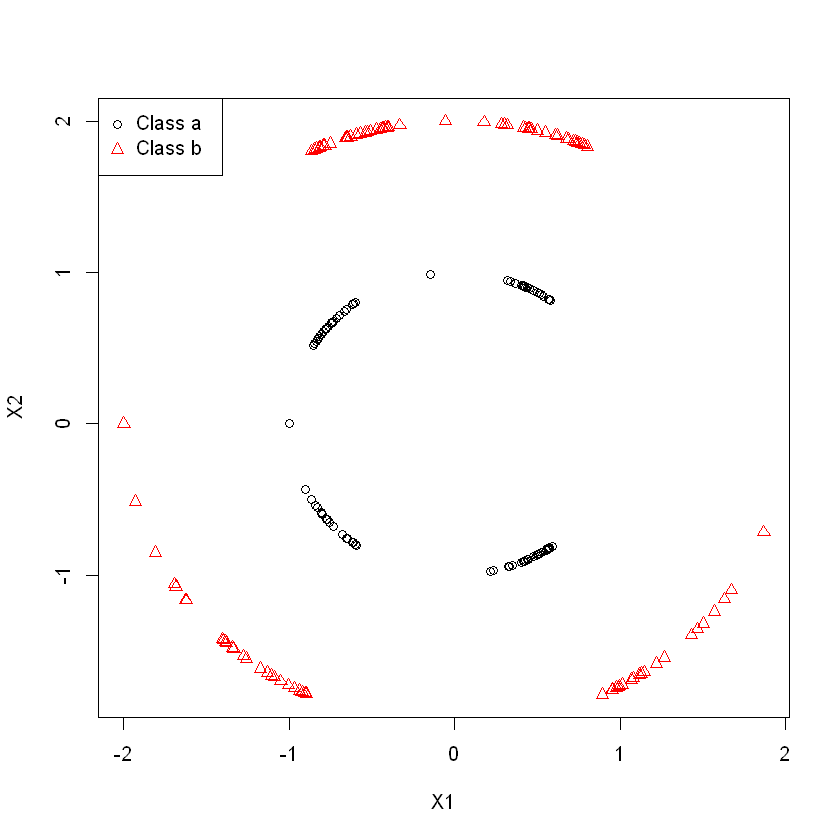

In [4]:
# Plotting "dat" as in HW paper
plot(dat[,1], dat[,2], col = lev, pch = lev, xlab = names(dat)[1], ylab = names(dat)[2])
legend("topleft", paste("Class",levels(dat[,3])), col = unique(lev), pch = unique(lev))

In [5]:
# Application PCA for the number of dimensions reduction to one
d_pca <- princomp(dat[,-3], cor = TRUE, scores = TRUE)
summary(d_pca, loadings = TRUE)
v_pca <- d_pca$scores

Importance of components:
                          Comp.1    Comp.2
Standard deviation     1.0004424 0.9995574
Proportion of Variance 0.5004425 0.4995575
Cumulative Proportion  0.5004425 1.0000000

Loadings:
   Comp.1 Comp.2
X1  0.707  0.707
X2  0.707 -0.707

integer(0)

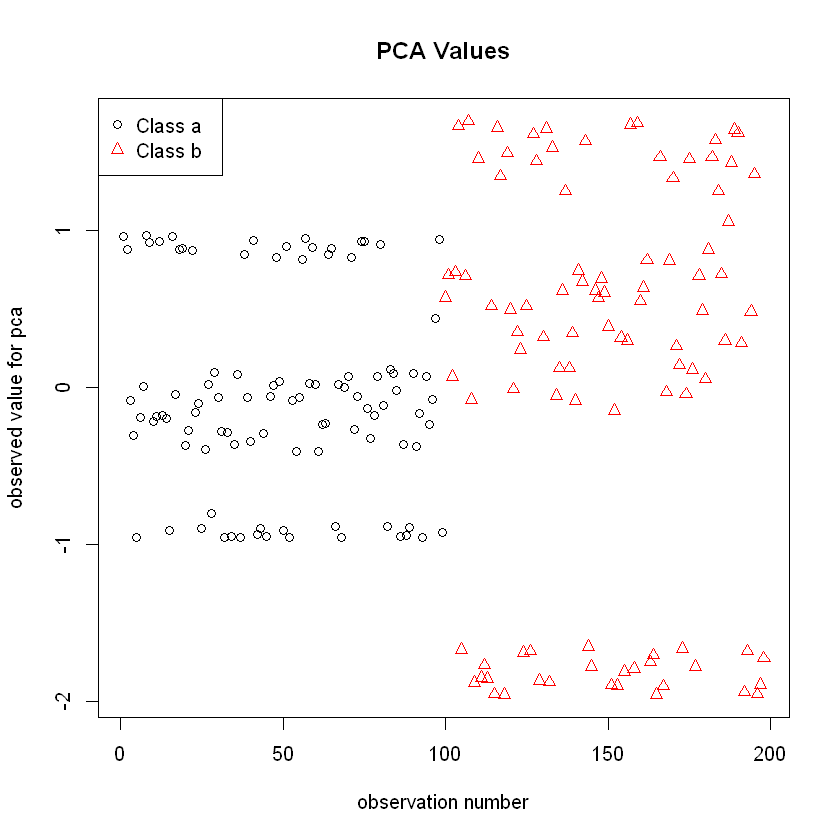

In [6]:
# Visualization of the instances on a scatter plot for PCA
plot(x = c(1:nrow(v_pca)), y = v_pca[,1], col = lev, pch = lev, xlab = "observation number", ylab = "observed value for pca") + title("PCA Values")
legend("topleft", paste("Class",levels(dat[,3])), col = unique(lev), pch = unique(lev))

integer(0)

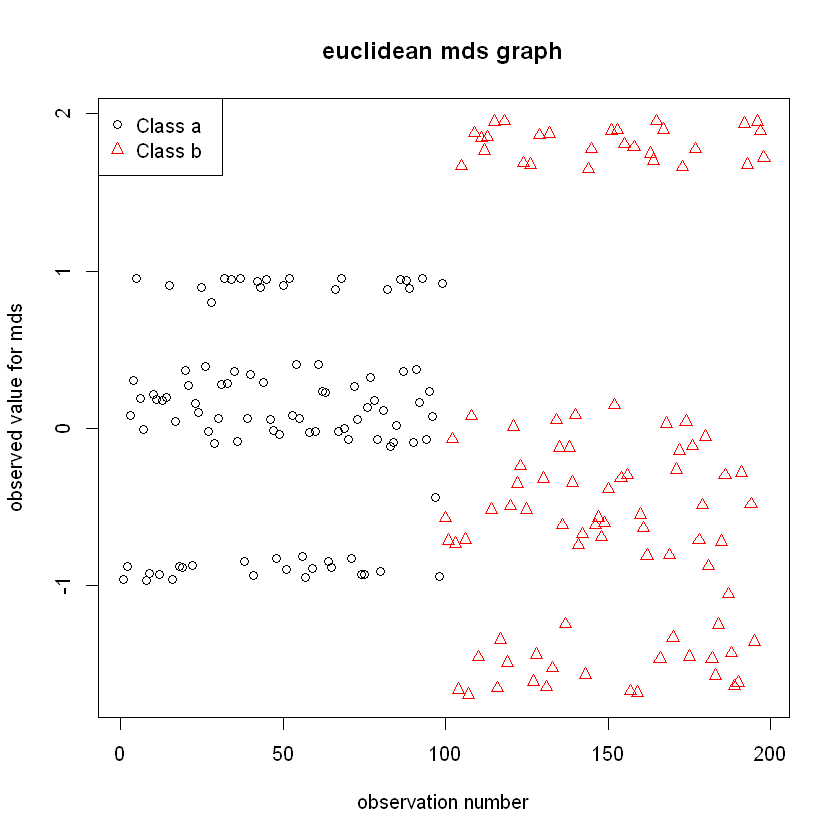

integer(0)

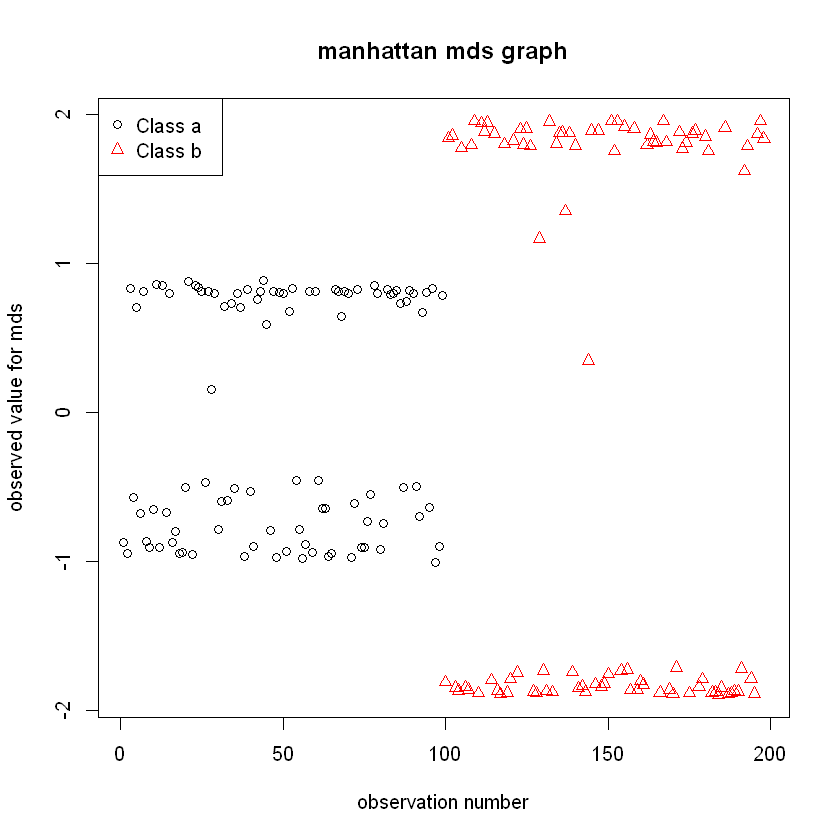

In [7]:
# Scaling of dat values & generating distance matrix
# Scaling
d_s <- scale(dat[,-3], center = TRUE, scale = TRUE)

# Matrix for Euclidean distance method
euc_dis = as.data.table(as.matrix(dist(d_s, method = "euclidean")))
# Matrix for Manhattan distance method
man_dis = as.data.table(as.matrix(dist(d_s, method = "manhattan")))

# Applying MDS on the scaled data for getting one dimension form:
# Euclidean MDS
mds_euc = cmdscale(euc_dis, k = 1) 
# Manhattan MDS
mds_man = cmdscale(man_dis, k = 1) 

# Visualization of the instances on a scatter for euclidean distance
plot(x = c(1:nrow(dat)), y = mds_euc, col = lev, pch = lev, xlab = "observation number", ylab = "observed value for mds") + title("euclidean mds graph")
legend("topleft", paste("Class",levels(dat[,3])), col = unique(lev), pch = unique(lev))

# Visualization of the instances on a scatter for manhattan distance
plot(x = c(1:nrow(dat)), y = mds_man, col = lev, pch = lev, xlab = "observation number", ylab = "observed value for mds") + title("manhattan mds graph")
legend("topleft", paste("Class",levels(dat[,3])), col = unique(lev), pch = unique(lev))

In [8]:
# Addition of extra three columns into the original data set
new_dat = as.data.table(dat)
new_dat$X12 <- dat$X1^2
new_dat$X22 <- dat$X2^2
new_dat$X1X2 <- dat$X1*dat$X2
head(new_dat)

X1,X2,class,X12,X22,X1X2
0.5694828,0.8220033,a,0.3243106,0.6756894,0.4681167
0.4114692,0.9114237,a,0.1693069,0.8306931,0.3750228
0.4173846,-0.9087299,a,0.1742099,0.8257901,-0.3792899
-0.7918276,0.6107447,a,0.6269909,0.3730091,-0.4836045
-0.8067767,-0.5908565,a,0.6508886,0.3491114,0.4766892
-0.7154271,0.6986874,a,0.5118360,0.4881640,-0.4998599


In [9]:
# Application PCA for new data set having three additional columns
nd_pca <- princomp(new_dat[,-3], cor = T, scores = T)
summary(nd_pca, loadings = T)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.3114557 1.1508988 0.9723549 0.7988684 0.60979578
Proportion of Variance 0.3439832 0.2649136 0.1890948 0.1276382 0.07437018
Cumulative Proportion  0.3439832 0.6088968 0.7979917 0.9256298 1.00000000

Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
X1    0.419  0.556  0.128  0.571  0.415
X2    0.538 -0.454        -0.368  0.600
X12  -0.539  0.162  0.578 -0.273  0.524
X22   0.351 -0.313  0.797  0.127 -0.356
X1X2 -0.348 -0.600         0.669  0.258

In [10]:
# Eigenvalues for PCA of new data set having three additional columns
eigenvalues = nd_pca$sdev^2
eigenvalues

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
1.7199160 1.3245681 0.9454741 0.6381908 0.3718509

# Task 2 – Reconstructing Turkey Map

In [11]:
# Required library for Task 2
library(readxl)
options(scipen=999)
library(ggplot2)
library(data.table)
library(tidyverse)
library(reshape2)
library(scatterplot3d)
library(tidyr)
library(scales)
library(MASS) 
library(dplyr)
# Reading & showing the data
distance_tur <- read_excel("ilmesafe.xls",skip=2)
head(distance_tur)

İL PLAKA NO,İL ADI,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
01,ADANA,NA,335,575,966,603,567,535,1035,...,621,709,782,1042,1066,899,714,246,87,735
02,ADIYAMAN,335,NA,910,648,632,814,870,751,...,303,471,1023,758,748,1147,955,210,248,976
03,AFYONKARAHİSAR,575,910,NA,1318,597,300,290,1243,...,1196,1284,515,1351,1461,338,447,821,662,375
04,AĞRI,966,648,1318,NA,738,1141,1428,396,...,369,430,1175,310,143,1363,1106,814,879,1192
05,AMASYA,603,632,597,736,NA,413,825,695,...,796,982,437,783,881,625,368,639,608,454
06,ANKARA,492,742,256,1054,333,NA,542,979,...,1001,1147,283,1087,1197,407,215,710,579,236


In [12]:
# Generating distance matrix for Turkey map to get latent variables in 2D dimensional
# Reading data as a matrix
dm_tur = as.matrix(read_excel("ilmesafe.xls", skip=2))
# Extersion of "il plaka no" from the matrix
dm_tur = dm_tur[, -1]
IL_ADI <- dm_tur[,1]
# Turning distance matrix into the symmetric form and Na values into numeric form (= 0)
row.names(dm_tur) = dm_tur[, 1] # adding city names column into distance matrix
dm_tur = dm_tur[, -1]
dm_tur =`class<-`(dm_tur, 'numeric') # assigning as numeric term
dm_tur[is.na(dm_tur)] <- 0  # (Na=0)
head(dm_tur)

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
ADANA,0,335,575,966,603,567,535,1035,874,903,...,621,709,782,1042,1066,899,714,246,87,735
ADIYAMAN,335,0,910,648,632,814,870,751,1209,1238,...,303,471,1023,758,748,1147,955,210,248,976
AFYONKARAHİSAR,575,910,0,1318,597,300,290,1243,345,328,...,1196,1284,515,1351,1461,338,447,821,662,375
AĞRI,966,648,1318,0,738,1141,1428,396,1640,1569,...,369,430,1175,310,143,1363,1106,814,879,1192
AMASYA,603,632,597,736,0,413,825,695,938,831,...,796,982,437,783,881,625,368,639,608,454
ANKARA,492,742,256,1054,333,0,542,979,597,536,...,1001,1147,283,1087,1197,407,215,710,579,236


integer(0)

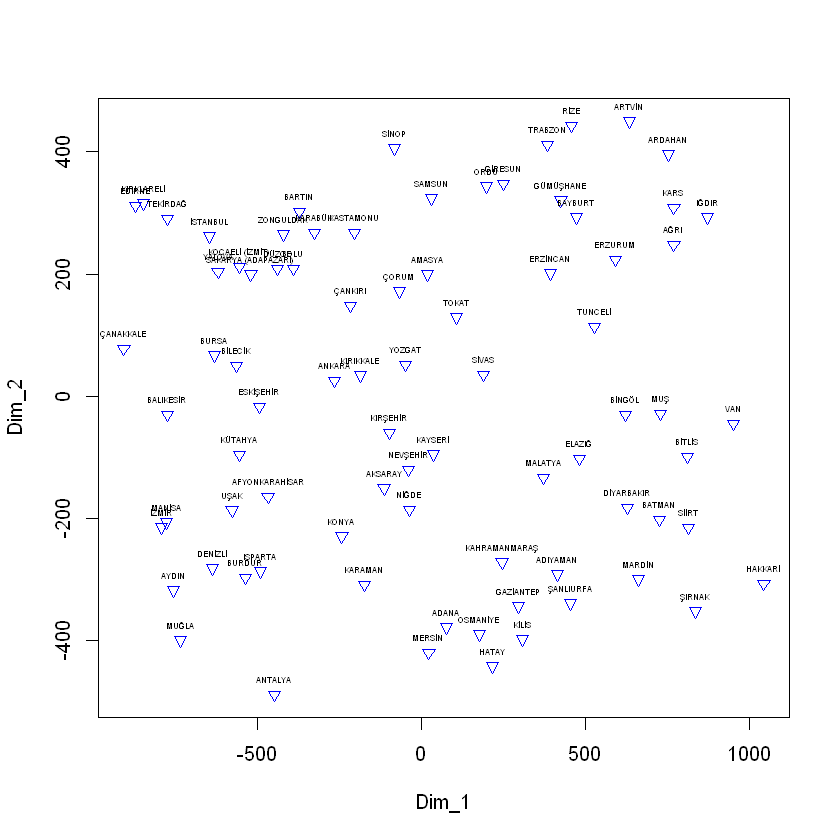

In [13]:
# Application of MDS and plotting MDS results for getting Turkey map
# MDS
mds_tur <- cmdscale(dm_tur, eig = TRUE, k = 2)
# Plotting part of the result
x = range(c(mds_tur$points[, 1])) 
y = range(c(mds_tur$points[, 2]))
plot(mds_tur$points[, 1], mds_tur$points[, 2], 
     type = "p", pch = 6, col = "blue",
     xlab = "Dim_1", ylab = "Dim_2", xlim = c(x), ylim = c(y)) + text(x = mds_tur$points[, 1], y = mds_tur$points[, 2], pos = 3, labels = IL_ADI, cex=0.4)

# Task 3 – Dimensionality reduction for time series data

In [14]:
# Required libraries
library(ggplot2)
library(data.table)
library(tidyverse)
library(reshape2)
library(scatterplot3d)
library(tidyr)
library(scales)
library(MASS) 
library(dplyr)
library(stats)
library(cowplot)

In [15]:
# reading x, y and z datas
x = read.table("uWaveGestureLibrary_X_TRAIN")
y = read.table("uWaveGestureLibrary_Y_TRAIN")
z = read.table("uWaveGestureLibrary_Z_TRAIN")

In [16]:
# Calling class as column name
colnames(x)[1] = "class"
colnames(y)[1] = "class"
colnames(z)[1] = "class"

In [17]:
# x Train
head(x)

class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,-0.7964140,-0.7417282,-0.6946985,-0.6476688,-0.6476688,-0.64766875,-0.64766875,-0.64766875,-0.64766875,-0.64766875
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.23763371,-0.23763371,-0.23763371,-0.23763371,-0.23763371
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.2820107,-0.2369291,-0.1918477,-0.1467662,-0.1016848,-0.06120346,-0.05663826,-0.05546207,-0.05546207,-0.05546207
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,1.2072899,1.1478218,1.0943436,1.0603618,1.0531583,1.04446710,1.01898080,0.90994938,0.79101316,0.67207694
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.44034250,-1.45251250,-1.46844580,-1.48437920,-1.50031250
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.5784697,0.5877041,0.5969386,0.6061730,0.6207059,0.63523879,0.65370767,0.67217655,0.69064543,0.70911432


In [18]:
# y Train
head(y)

class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,...,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335
5,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,...,-1.51726140,-1.55496780,-1.59267430,-1.62987010,-1.66252390,-1.66252390,-1.66252390,-1.66252390,-1.66252390,-1.66252390
5,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,...,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970
3,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,...,-1.53169760,-1.63940370,-1.74784270,-1.83756330,-1.90157430,-1.93363630,-1.91732350,-1.66037750,-1.37490280,-1.08942800
4,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,...,-2.18080690,-2.22243160,-2.24174530,-2.24174530,-2.24174530,-2.22951440,-2.18521200,-2.12721040,-2.06920870,-2.01120700
8,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,...,0.11281392,0.11281392,0.11281392,0.11281392,0.12389440,0.13497489,0.15428659,0.17359829,0.19290999,0.21222169


In [19]:
# z Train
head(z)

class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


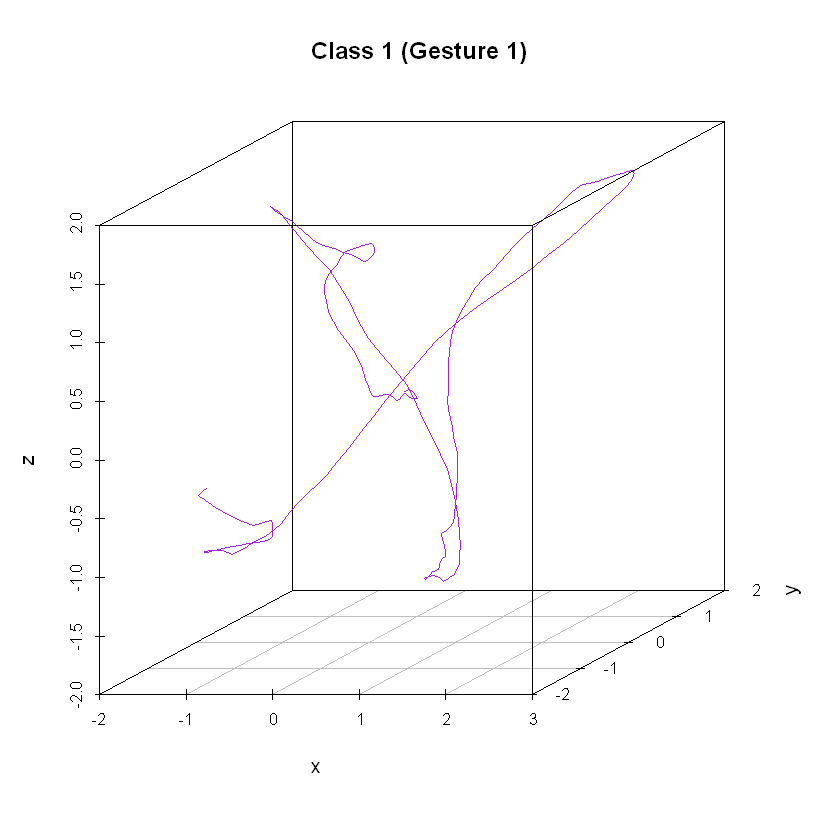

In [20]:
# Getting transposes for Class 1 (or Gesture 1)
# for x data
xt1 <- x[11,]
xt1 <- t(xt1[,-1])
# for y data
yt1 <- y[11,]
yt1 <- t(yt1[,-1])
# for z data
zt1 <- z[11,]
zt1 <- t(zt1[,-1])
#Binding all data as xyz_data and showing xyz_data 
xyz_data1 <- cbind(xt1, yt1, zt1)
xyz_data1 <- data.frame(xyz_data1)
colnames(xyz_data1) <- c("x","y","z")
# Plotting Class 1 (or Gesture 1) for one instance
scatterplot3d(xyz_data1$x, xyz_data1$y, xyz_data1$z, 
              type = "l",pch = 55, color = "purple",
              xlab = "x", ylab = "y", zlab = "z", 
              grid=TRUE, main="Class 1 (Gesture 1)")

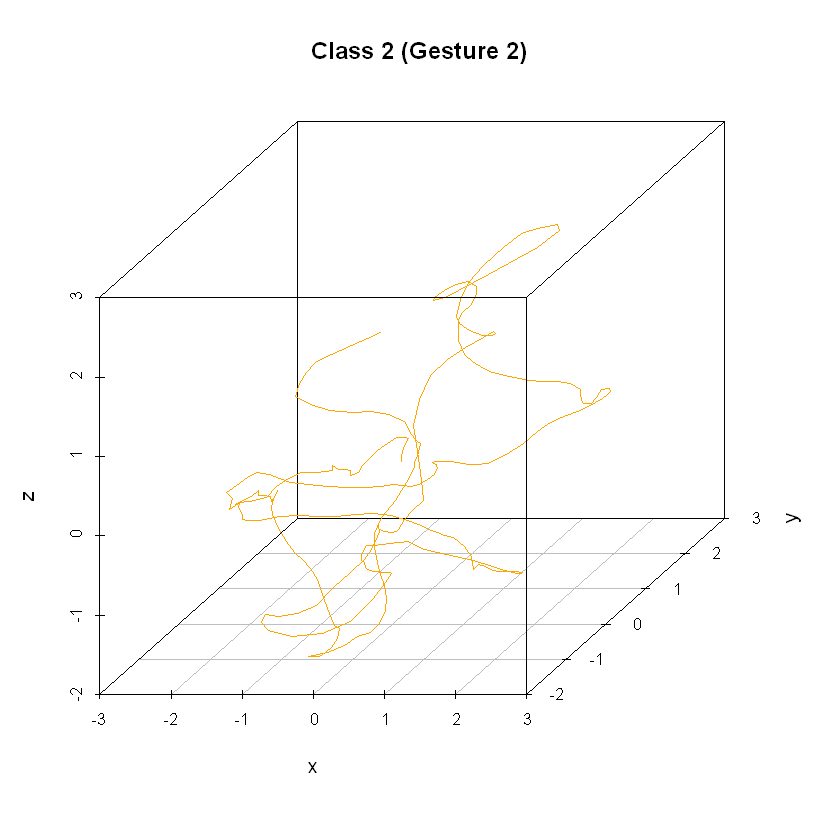

In [21]:
# Getting transposes for Class 2 (or Gesture 2)
# for x data
xt2 <- x[20,]
xt2 <- t(xt2[,-1])
# for y data
yt2 <- y[20,]
yt2 <- t(yt2[,-1])
# for z data
zt2 <- z[20,]
zt2 <- t(zt2[,-1])
#Binding all data as xyz_data and showing xyz_data 
xyz_data2 <- cbind(xt2, yt2, zt2)
xyz_data2 <- data.frame(xyz_data2)
colnames(xyz_data2) <- c("x","y","z")
# Plotting Class 2 (or Gesture 2) for one instance
scatterplot3d(xyz_data2$x, xyz_data2$y, xyz_data2$z, 
              type = "l",pch = 55, color = "orange",
              xlab = "x", ylab = "y", zlab = "z", 
              grid=TRUE, main="Class 2 (Gesture 2)")

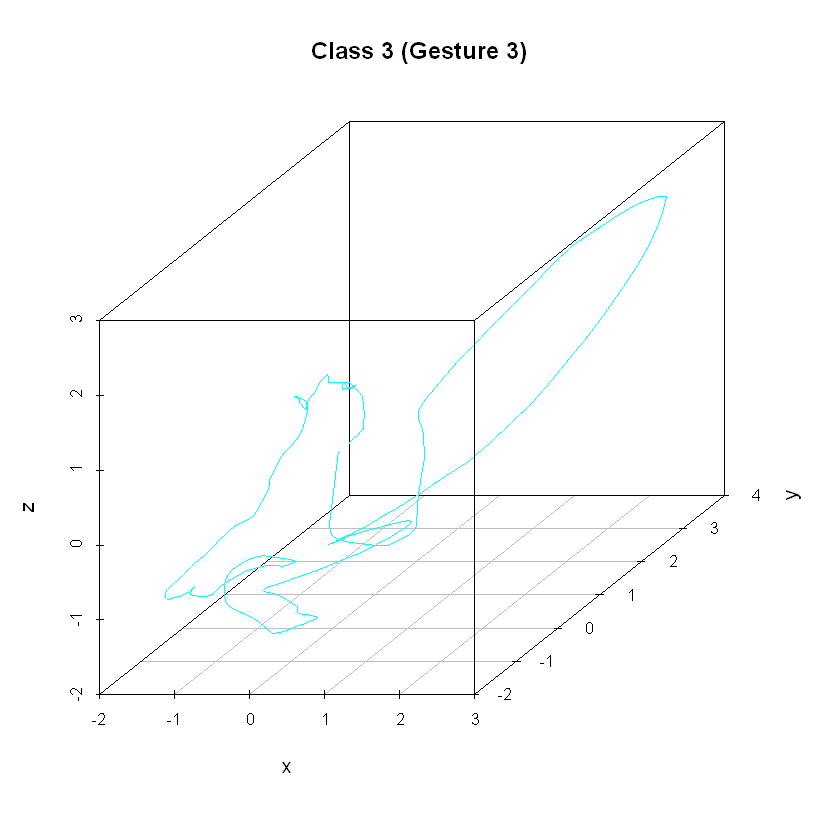

In [22]:
# Getting transposes for Class 3 (or Gesture 3)
# for x data
xt3 <- x[4,]
xt3 <- t(xt3[,-1])
# for y data
yt3 <- y[4,]
yt3 <- t(yt3[,-1])
# for z data
zt3 <- z[4,]
zt3 <- t(zt3[,-1])
#Binding all data as xyz_data and showing xyz_data 
xyz_data3 <- cbind(xt3, yt3, zt3)
xyz_data3 <- data.frame(xyz_data3)
colnames(xyz_data3) <- c("x","y","z")
# Plotting Class 3 (or Gesture 3) for one instance
scatterplot3d(xyz_data3$x, xyz_data3$y, xyz_data3$z, 
              type = "l",pch = 55, color = "cyan",
              xlab = "x", ylab = "y", zlab = "z", 
              grid=TRUE, main="Class 3 (Gesture 3)")

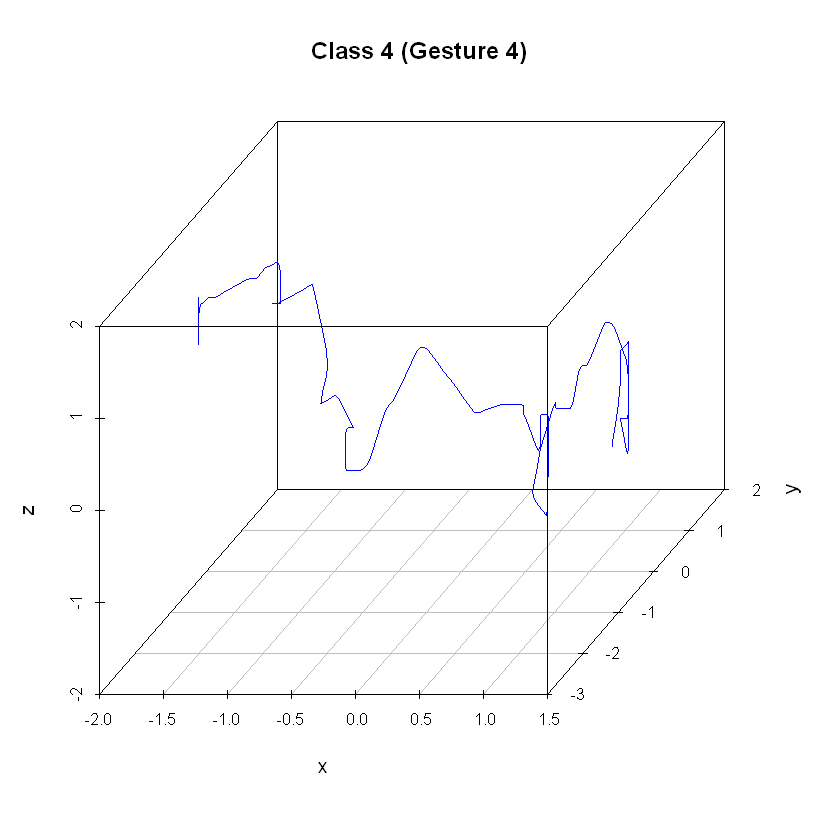

In [23]:
# Getting transposes for Class 4 (or Gesture 4)
# for x data
xt4 <- x[5,]
xt4 <- t(xt4[,-1])
# for y data
yt4 <- y[5,]
yt4 <- t(yt4[,-1])
# for z data
zt4 <- z[5,]
zt4 <- t(zt4[,-1])
#Binding all data as xyz_data and showing xyz_data 
xyz_data4 <- cbind(xt4, yt4, zt4)
xyz_data4 <- data.frame(xyz_data4)
colnames(xyz_data4) <- c("x","y","z")
# Plotting Class 4 (or Gesture 4) for one instance
scatterplot3d(xyz_data4$x, xyz_data4$y, xyz_data4$z, 
              type = "l",pch = 55, color = "blue",
              xlab = "x", ylab = "y", zlab = "z", 
              grid=TRUE, main="Class 4 (Gesture 4)")

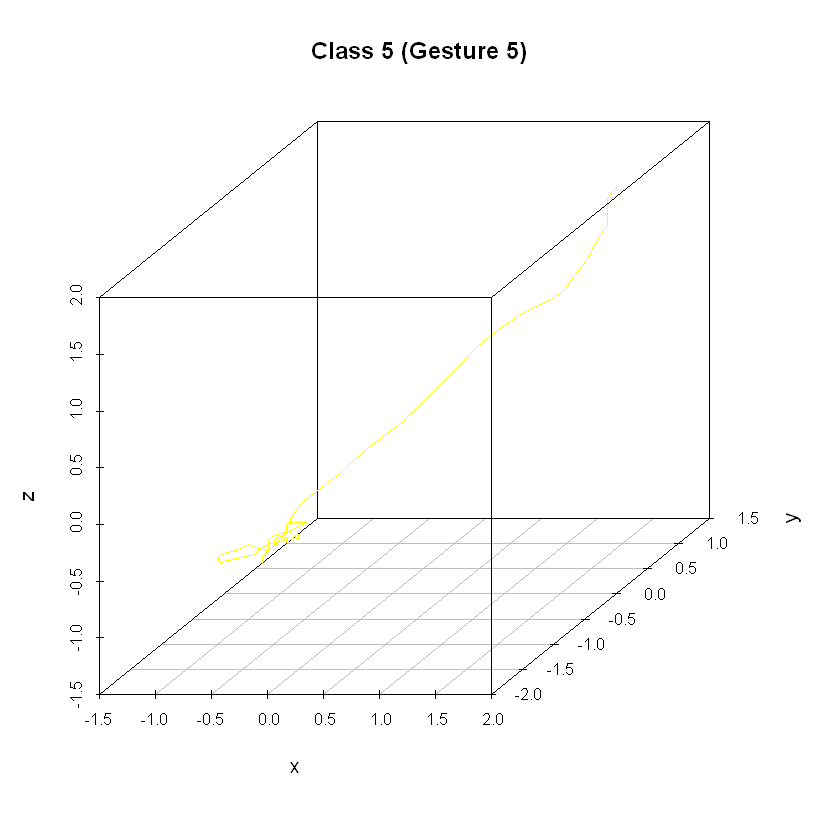

In [24]:
# Getting transposes for Class 5 (or Gesture 5)
# for x data
xt5 <- x[2,]
xt5 <- t(xt5[,-1])
# for y data
yt5 <- y[2,]
yt5 <- t(yt5[,-1])
# for z data
zt5 <- z[2,]
zt5 <- t(zt5[,-1])
#Binding all data as xyz_data and showing xyz_data 
xyz_data5 <- cbind(xt5, yt5, zt5)
xyz_data5 <- data.frame(xyz_data5)
colnames(xyz_data5) <- c("x","y","z")
# Plotting Class 5 (or Gesture 5) for one instance
scatterplot3d(xyz_data5$x, xyz_data5$y, xyz_data5$z, 
              type = "l",pch = 55, color = "yellow",
              xlab = "x", ylab = "y", zlab = "z", 
              grid=TRUE, main="Class 5 (Gesture 5)")

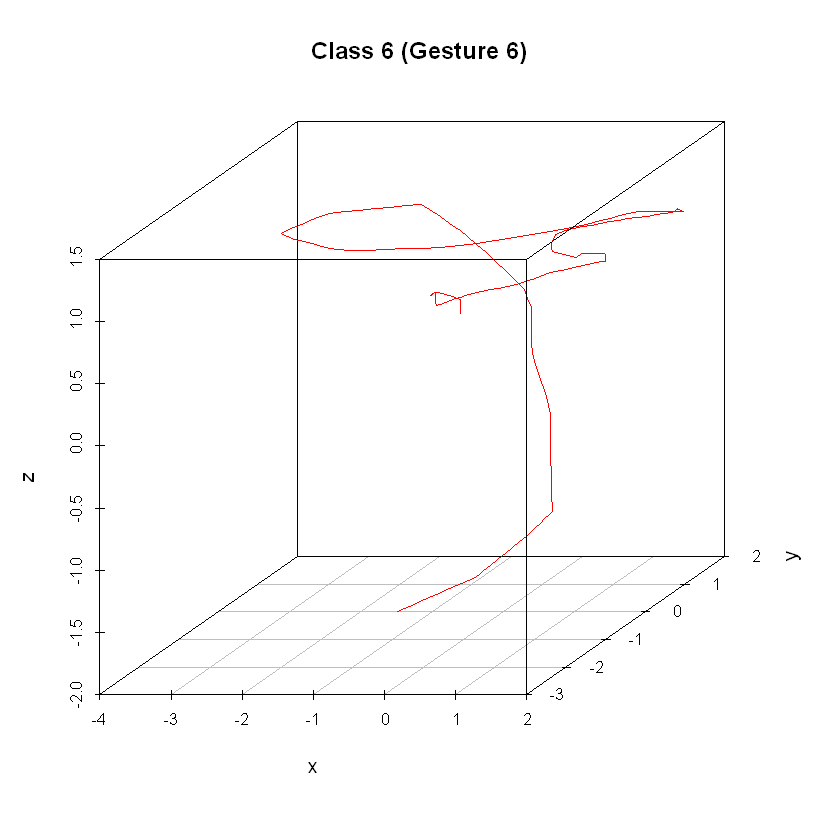

In [25]:
# Getting transposes for Class 6 (or Gesture 6)
# for x data
xt6 <- x[1,]
xt6 <- t(xt6[,-1])
# for y data
yt6 <- y[1,]
yt6 <- t(yt6[,-1])
# for z data
zt6 <- z[1,]
zt6 <- t(zt6[,-1])
#Binding all data as xyz_data and showing xyz_data 
xyz_data6 <- cbind(xt6, yt6, zt6)
xyz_data6 <- data.frame(xyz_data6)
colnames(xyz_data6) <- c("x","y","z")
# Plotting Class 6 (or Gesture 6) for one instance
scatterplot3d(xyz_data6$x, xyz_data6$y, xyz_data6$z, 
              type = "l",pch = 55, color = "red",
              xlab = "x", ylab = "y", zlab = "z", 
              grid=TRUE, main="Class 6 (Gesture 6)")

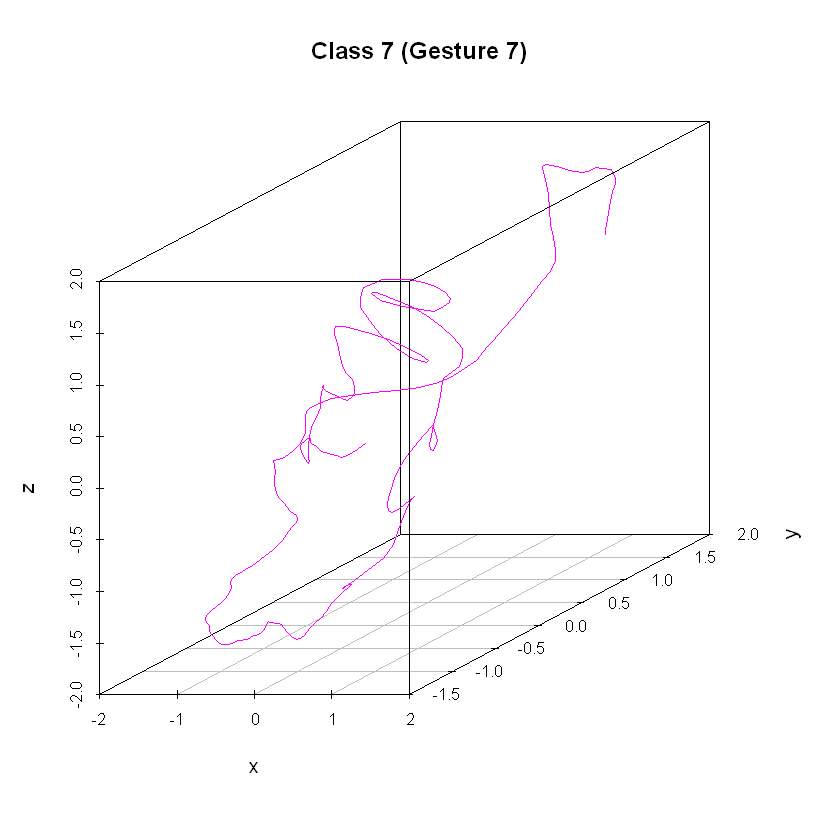

In [26]:
# Getting transposes for Class 7 (or Gesture 7)
# for x data
xt7 <- x[7,]
xt7 <- t(xt7[,-1])
# for y data
yt7 <- y[7,]
yt7 <- t(yt7[,-1])
# for z data
zt7 <- z[7,]
zt7 <- t(zt7[,-1])
#Binding all data as xyz_data and showing xyz_data 
xyz_data7 <- cbind(xt7, yt7, zt7)
xyz_data7 <- data.frame(xyz_data7)
colnames(xyz_data7) <- c("x","y","z")
# Plotting Class 7 (or Gesture 7) for one instance
scatterplot3d(xyz_data7$x, xyz_data7$y, xyz_data7$z, 
              type = "l",pch = 55, color = "magenta",
              xlab = "x", ylab = "y", zlab = "z", 
              grid=TRUE, main="Class 7 (Gesture 7)")

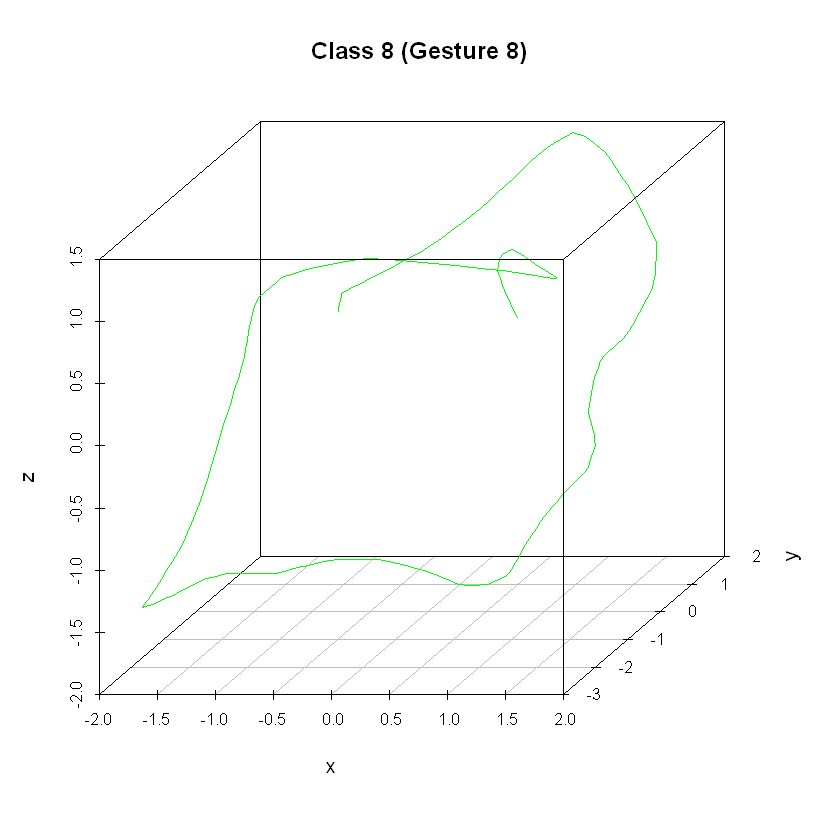

In [27]:
# Getting transposes for Class 8 (or Gesture 8)
# for x data
xt8 <- x[6,]
xt8 <- t(xt8[,-1])
# for y data
yt8 <- y[6,]
yt8 <- t(yt8[,-1])
# for z data
zt8 <- z[6,]
zt8 <- t(zt8[,-1])
#Binding all data as xyz_data and showing xyz_data 
xyz_data8 <- cbind(xt8, yt8, zt8)
xyz_data8 <- data.frame(xyz_data8)
colnames(xyz_data8) <- c("x","y","z")
# Plotting Class 8 (or Gesture 8) for one instance
scatterplot3d(xyz_data8$x, xyz_data8$y, xyz_data8$z, 
              type = "l",pch = 55, color = "green",
              xlab = "x", ylab = "y", zlab = "z", 
              grid=TRUE, main="Class 8 (Gesture 8)")

In [28]:
# Reading the data & Rearranging x, y and z datas with new column name 
cn <- function(letter, length){ lst <- rep(1,length)
for(i in 1:length){c <- paste(letter, toString(i))
lst[i] <- c}
return(lst)
}
# Reading data
xt = read.table("uWaveGestureLibrary_X_TRAIN")
yt = read.table("uWaveGestureLibrary_Y_TRAIN")
zt = read.table("uWaveGestureLibrary_Z_TRAIN")
# Class column assigment
colnames(xt)[1] = "class"
colnames(yt)[1] = "class"
colnames(zt)[1] = "class"
# Rearrangement of column name
xc <- cn("X",dim(xt)[2]-1)
colnames(xt)[2:316] = xc
yc <- cn("Y",dim(yt)[2]-1)
colnames(yt)[2:316] = yc
zc <- cn("Z",dim(zt)[2]-1)
colnames(zt)[2:316] = zc
# Binding all data as xyz_data and showing xyz_data
xyz_data = cbind(xt, yt, zt)
head(xyz_data)

class,X 1,X 2,X 3,X 4,X 5,X 6,X 7,X 8,X 9,...,Z 306,Z 307,Z 308,Z 309,Z 310,Z 311,Z 312,Z 313,Z 314,Z 315
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


In [29]:
# Filtering data for each class 
fd_1 <- xyz_data[xyz_data$class == 1,]
fd_2 <- xyz_data[xyz_data$class == 2,]
fd_3 <- xyz_data[xyz_data$class == 3,]
fd_4 <- xyz_data[xyz_data$class == 4,]
fd_5 <- xyz_data[xyz_data$class == 5,]
fd_6 <- xyz_data[xyz_data$class == 6,]
fd_7 <- xyz_data[xyz_data$class == 7,]
fd_8 <- xyz_data[xyz_data$class == 8,]
# Transpose of each filtered data
fd_1 <- t(fd_1[,-1])
fd_2 <- t(fd_2[,-1])
fd_3 <- t(fd_3[,-1])
fd_4 <- t(fd_4[,-1])
fd_5 <- t(fd_5[,-1])
fd_6 <- t(fd_6[,-1])
fd_7 <- t(fd_7[,-1])
fd_8 <- t(fd_8[,-1])

In [30]:
# Applying PCA to filtered data from each class & obtaining eigenvectors
# for PCA of Class 1
PCA_1 <- princomp(fd_1)
summary(PCA_1, loadings = T)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     8.0347151 3.5528125 2.8664695 2.31211905 2.18953728
Proportion of Variance 0.5308368 0.1037922 0.0675639 0.04395826 0.03942074
Cumulative Proportion  0.5308368 0.6346290 0.7021929 0.74615120 0.78557194
                           Comp.6     Comp.7     Comp.8    Comp.9    Comp.10
Standard deviation     1.98617489 1.87252331 1.56654617 1.3957020 1.28407613
Proportion of Variance 0.03243807 0.02883199 0.02017932 0.0160179 0.01355819
Cumulative Proportion  0.81801002 0.84684200 0.86702132 0.8830392 0.89659740
                          Comp.11    Comp.12   Comp.13     Comp.14     Comp.15
Standard deviation     1.15217568 1.04405569 0.9953004 0.975512505 0.925388222
Proportion of Variance 0.01091585 0.00896329 0.0081457 0.007825026 0.007041546
Cumulative Proportion  0.90751325 0.91647654 0.9246222 0.932447269 0.939488815
                           Comp.16     Comp.17    

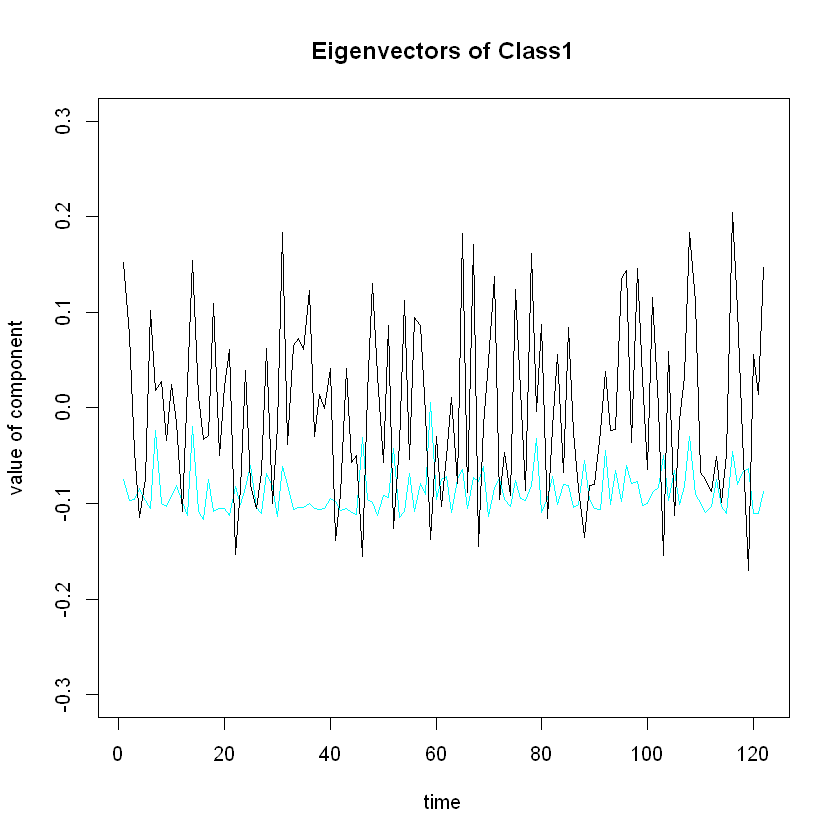

In [31]:
# for eigenvectors of Class 1
ev11 <- eigen(cov(fd_1))$vectors[,1]
ev12 <- eigen(cov(fd_1))$vectors[,2]
plot(1:length(ev11),ev11, type = "l", col = 5, 
     xlab = "time", ylab = "value of component",
    main = "Eigenvectors of Class1", ylim = c(-0.3,0.3))
lines(1:length(ev12),ev12, type = "l", col = 9)

In [32]:
# for PCA of Class 2
PCA_2 <- princomp(fd_2)
summary(PCA_2, loadings = T)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4    Comp.5
Standard deviation     7.5807962 4.0813746 2.27055252 1.77744597 1.6305191
Proportion of Variance 0.5304445 0.1537529 0.04758537 0.02916105 0.0245393
Cumulative Proportion  0.5304445 0.6841974 0.73178278 0.76094383 0.7854831
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.60688477 1.48912132 1.25924040 1.16911151 1.15654393
Proportion of Variance 0.02383306 0.02046777 0.01463618 0.01261602 0.01234624
Cumulative Proportion  0.80931619 0.82978396 0.84442014 0.85703615 0.86938239
                          Comp.11    Comp.12     Comp.13     Comp.14   Comp.15
Standard deviation     1.08029123 1.04924070 1.014509354 0.914913152 0.8768146
Proportion of Variance 0.01077189 0.01016156 0.009499975 0.007726274 0.0070962
Cumulative Proportion  0.88015428 0.89031585 0.899815823 0.907542097 0.9146383
                           Comp.16     Comp.17

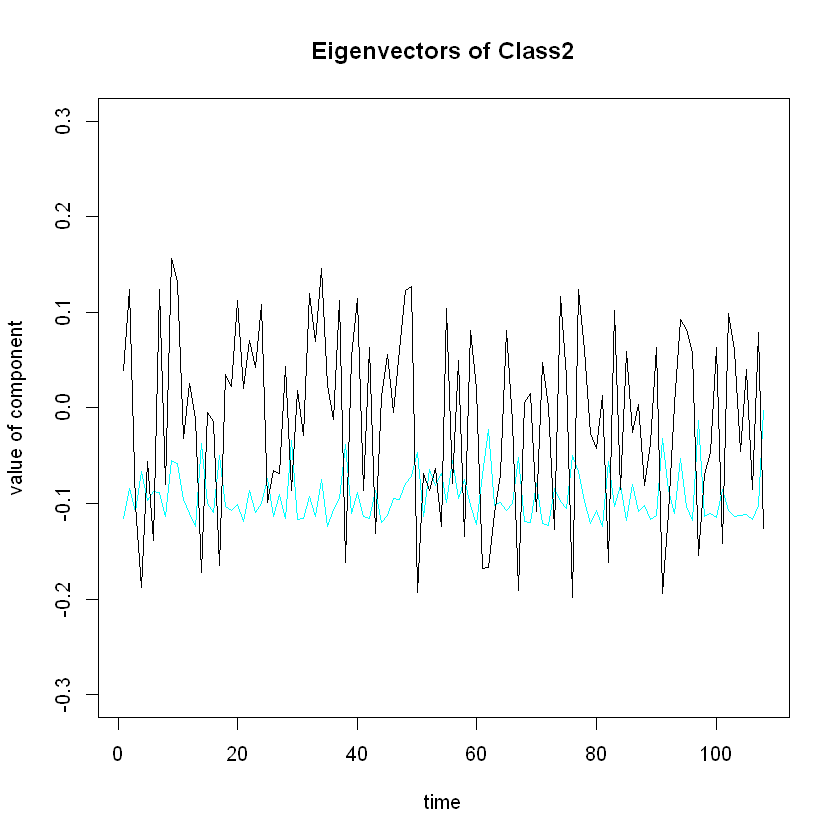

In [33]:
# for eigenvectors of Class 2
ev21 <- eigen(cov(fd_2))$vectors[,1]
ev22 <- eigen(cov(fd_2))$vectors[,2]
plot(1:length(ev21),ev21, type = "l", col = 5, 
     xlab = "time", ylab = "value of component",
    main = "Eigenvectors of Class2", ylim = c(-0.3,0.3))
lines(1:length(ev22),ev22, type = "l", col = 9)

In [34]:
# for PCA of Class 3
PCA_3 <- princomp(fd_3)
summary(PCA_3, loadings = T)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     6.7233186 4.4002994 2.61956643 2.35470765 2.21209723
Proportion of Variance 0.4206854 0.1801999 0.06386294 0.05160171 0.04554057
Cumulative Proportion  0.4206854 0.6008853 0.66474825 0.71634996 0.76189054
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     2.02082195 1.90620951 1.55910044 1.33954845 1.21400517
Proportion of Variance 0.03800548 0.03381671 0.02262238 0.01669963 0.01371612
Cumulative Proportion  0.79989601 0.83371272 0.85633510 0.87303473 0.88675085
                          Comp.11    Comp.12     Comp.13     Comp.14
Standard deviation     1.13796660 1.07490054 0.936310413 0.908875803
Proportion of Variance 0.01205172 0.01075293 0.008158866 0.007687748
Cumulative Proportion  0.89880257 0.90955550 0.917714361 0.925402110
                           Comp.15     Comp.16     Comp.17     Comp.18
Standard de

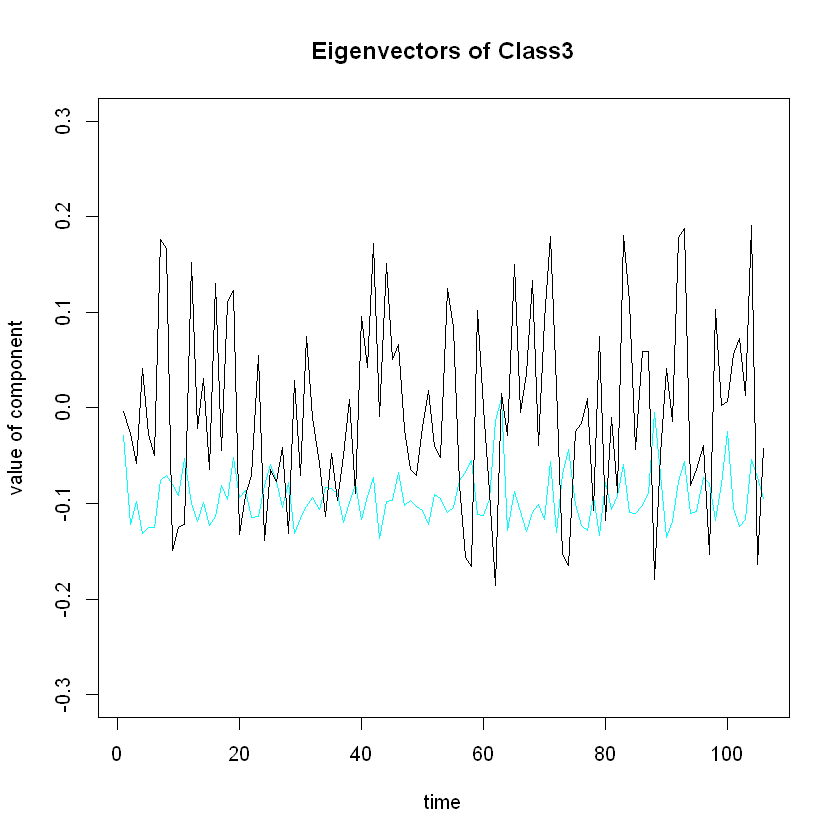

In [35]:
# for eigenvectors of Class 3
ev31 <- eigen(cov(fd_3))$vectors[,1]
ev32 <- eigen(cov(fd_3))$vectors[,2]
plot(1:length(ev31),ev31, type = "l", col = 5, 
     xlab = "time", ylab = "value of component",
    main = "Eigenvectors of Class3", ylim = c(-0.3,0.3))
lines(1:length(ev32),ev32, type = "l", col = 9)

In [36]:
# for PCA of Class 4
PCA_4 <- princomp(fd_4)
summary(PCA_4, loadings = T)

Importance of components:
                         Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     6.982109 3.7970248 3.4091366 2.45146543 2.40197903
Proportion of Variance 0.430925 0.1274428 0.1027347 0.05312269 0.05099961
Cumulative Proportion  0.430925 0.5583678 0.6611025 0.71422522 0.76522484
                           Comp.6     Comp.7    Comp.8     Comp.9    Comp.10
Standard deviation     2.18536708 1.86979265 1.4798517 1.30643997 1.24774908
Proportion of Variance 0.04221602 0.03090405 0.0193582 0.01508716 0.01376205
Cumulative Proportion  0.80744085 0.83834490 0.8577031 0.87279025 0.88655230
                          Comp.11     Comp.12     Comp.13    Comp.14
Standard deviation     1.12090387 1.062533165 1.025225228 0.95298469
Proportion of Variance 0.01110619 0.009979608 0.009291098 0.00802787
Cumulative Proportion  0.89765849 0.907638100 0.916929198 0.92495707
                           Comp.15     Comp.16     Comp.17     Comp.18
Standard deviation     

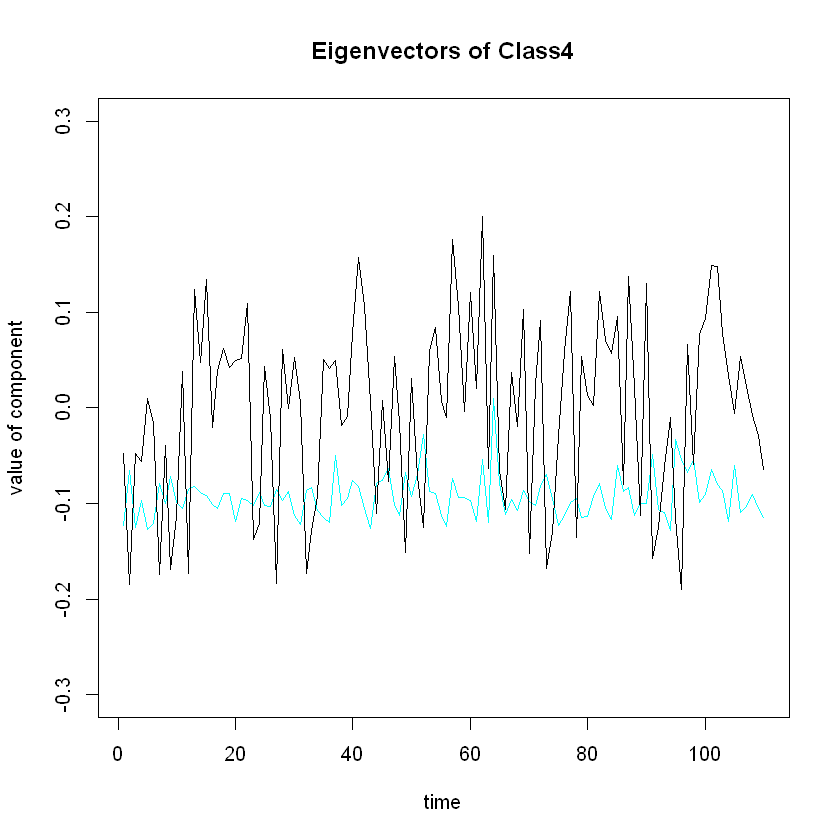

In [37]:
# for eigenvectors of Class 4
ev41 <- eigen(cov(fd_4))$vectors[,1]
ev42 <- eigen(cov(fd_4))$vectors[,2]
plot(1:length(ev41),ev41, type = "l", col = 5, 
     xlab = "time", ylab = "value of component",
    main = "Eigenvectors of Class4", ylim = c(-0.3,0.3))
lines(1:length(ev42),ev42, type = "l", col = 9)

In [38]:
# for PCA of Class 5
PCA_5 <- princomp(fd_5)
summary(PCA_5, loadings = T)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     8.5381274 4.0103966 3.7477448 2.11637535 1.99124988
Proportion of Variance 0.5480322 0.1209081 0.1055895 0.03367179 0.02980797
Cumulative Proportion  0.5480322 0.6689403 0.7745298 0.80820163 0.83800960
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.75289469 1.59284480 1.33941883 1.23502507 1.15817756
Proportion of Variance 0.02309896 0.01907338 0.01348695 0.01146654 0.01008396
Cumulative Proportion  0.86110856 0.88018195 0.89366889 0.90513543 0.91521939
                          Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     1.10451705 1.055241158 1.002338188 0.969372943
Proportion of Variance 0.00917119 0.008371133 0.007552824 0.007064194
Cumulative Proportion  0.92439058 0.932761714 0.940314539 0.947378732
                           Comp.15     Comp.16     Comp.17     Comp.18
Standard de

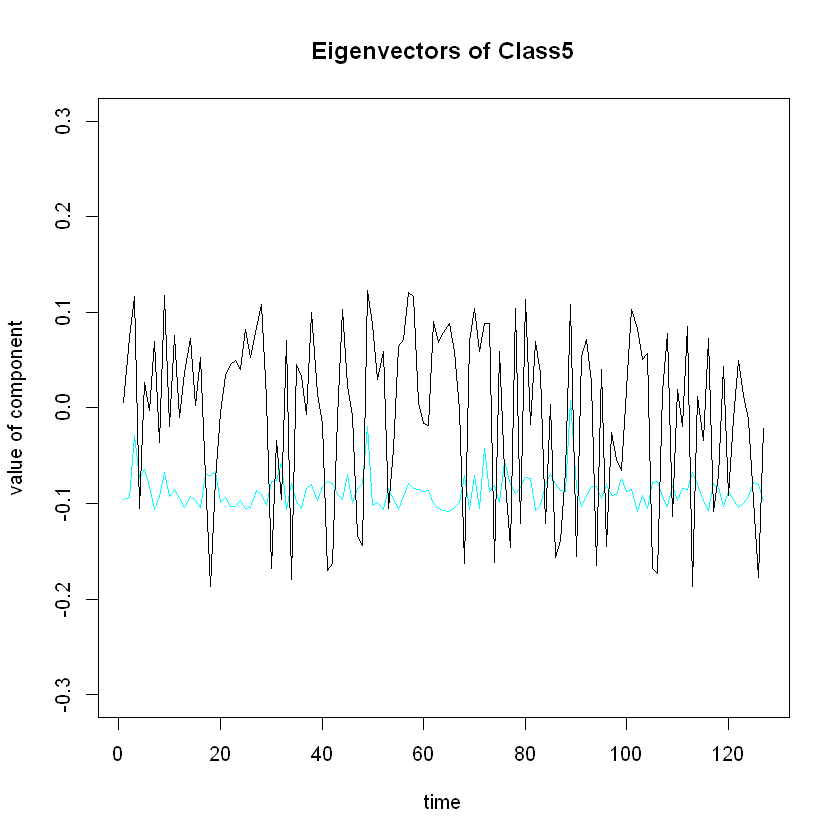

In [39]:
# for eigenvectors of Class 5
ev51 <- eigen(cov(fd_5))$vectors[,1]
ev52 <- eigen(cov(fd_5))$vectors[,2]
plot(1:length(ev51),ev51, type = "l", col = 5, 
     xlab = "time", ylab = "value of component",
    main = "Eigenvectors of Class5", ylim = c(-0.3,0.3))
lines(1:length(ev52),ev52, type = "l", col = 9)

In [40]:
# for PCA of Class 6
PCA_6 <- princomp(fd_6)
summary(PCA_6, loadings = T)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     7.2239602 3.7048901 3.38595500 2.46317446 2.20313840
Proportion of Variance 0.4391419 0.1155061 0.09647539 0.05105573 0.04084489
Cumulative Proportion  0.4391419 0.5546480 0.65112336 0.70217910 0.74302399
                           Comp.6     Comp.7     Comp.8    Comp.9   Comp.10
Standard deviation     1.89307317 1.73553044 1.70374547 1.5434062 1.3858766
Proportion of Variance 0.03015706 0.02534654 0.02442663 0.0200454 0.0161623
Cumulative Proportion  0.77318104 0.79852758 0.82295422 0.8429996 0.8591619
                          Comp.11    Comp.12    Comp.13     Comp.14     Comp.15
Standard deviation     1.30177384 1.21506081 1.16633687 1.086127766 1.029461904
Proportion of Variance 0.01426019 0.01242368 0.01144728 0.009926954 0.008918149
Cumulative Proportion  0.87342210 0.88584578 0.89729306 0.907220014 0.916138163
                           Comp.16     Comp.17

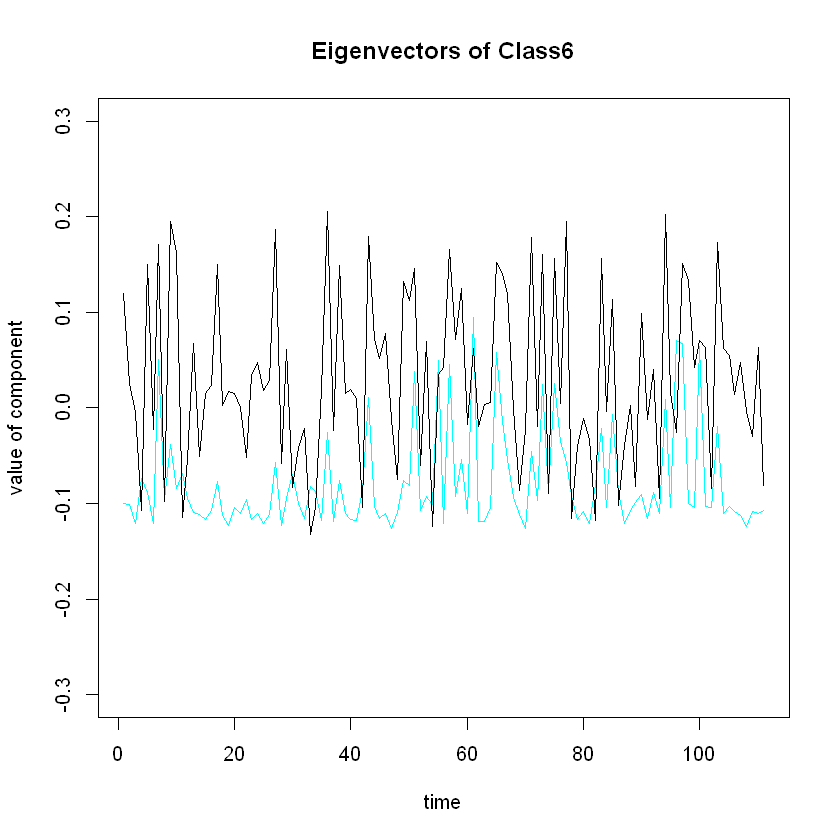

In [41]:
# for eigenvectors of Class 6
ev61 <- eigen(cov(fd_6))$vectors[,1]
ev62 <- eigen(cov(fd_6))$vectors[,2]
plot(1:length(ev61),ev61, type = "l", col = 5, 
     xlab = "time", ylab = "value of component",
    main = "Eigenvectors of Class6", ylim = c(-0.3,0.3))
lines(1:length(ev62),ev62, type = "l", col = 9)

In [42]:
# for PCA of Class 7
PCA_7 <- princomp(fd_7)
summary(PCA_7, loadings = T)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     8.1217074 4.2804531 3.02031139 2.55272432 1.81430702
Proportion of Variance 0.5363888 0.1489925 0.07418028 0.05298987 0.02676743
Cumulative Proportion  0.5363888 0.6853814 0.75956167 0.81255154 0.83931897
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.55703954 1.50074713 1.29645390 1.21917968 1.15803345
Proportion of Variance 0.01971444 0.01831471 0.01366782 0.01208705 0.01090504
Cumulative Proportion  0.85903340 0.87734812 0.89101593 0.90310299 0.91400803
                           Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     1.024568287 0.922406779 0.856105717 0.793927803
Proportion of Variance 0.008536245 0.006918788 0.005959912 0.005125628
Cumulative Proportion  0.922544275 0.929463063 0.935422975 0.940548603
                           Comp.15     Comp.16     Comp.17     Comp.18
Sta

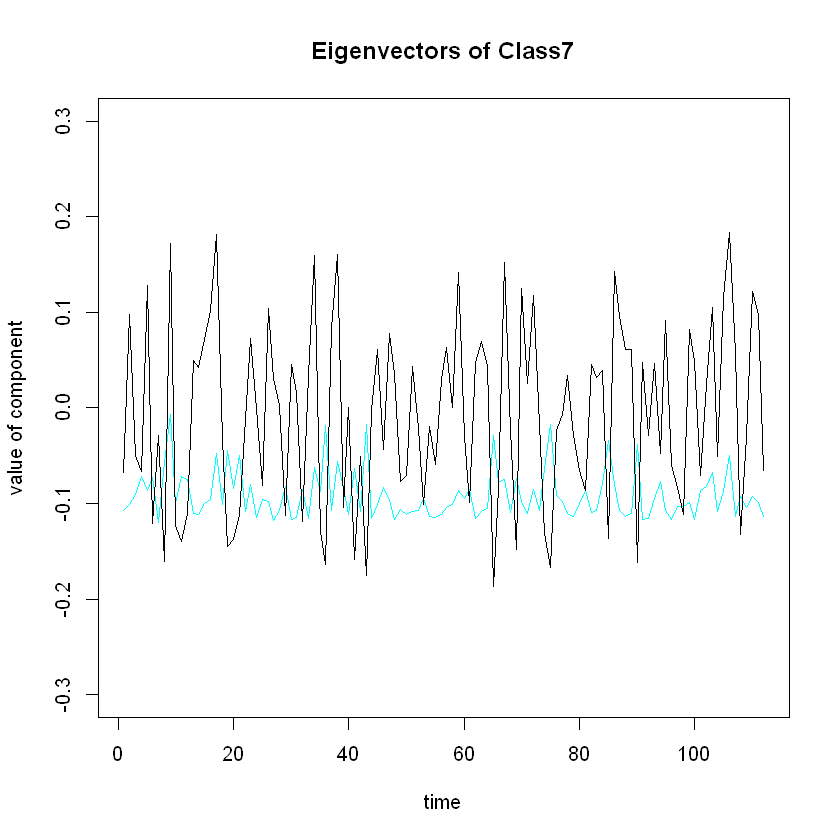

In [43]:
# for eigenvectors of Class 7
ev71 <- eigen(cov(fd_7))$vectors[,1]
ev72 <- eigen(cov(fd_7))$vectors[,2]
plot(1:length(ev71),ev71, type = "l", col = 5, 
     xlab = "time", ylab = "value of component",
    main = "Eigenvectors of Class7", ylim = c(-0.3,0.3))
lines(1:length(ev72),ev72, type = "l", col = 9)

In [44]:
# for PCA of Class 8
PCA_8 <- princomp(fd_8)
summary(PCA_8, loadings = T)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     7.6585723 5.1607805 2.33789818 2.13851587 1.67638703
Proportion of Variance 0.5192441 0.2357799 0.04838682 0.04048563 0.02487852
Cumulative Proportion  0.5192441 0.7550240 0.80341079 0.84389642 0.86877494
                           Comp.6     Comp.7     Comp.8      Comp.9     Comp.10
Standard deviation     1.41176801 1.30693023 1.19446314 1.051012324 0.980060811
Proportion of Variance 0.01764423 0.01512101 0.01263053 0.009778935 0.008503192
Cumulative Proportion  0.88641916 0.90154017 0.91417070 0.923949630 0.932452822
                           Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     0.876012768 0.806281777 0.767868074 0.721458333
Proportion of Variance 0.006793551 0.005755057 0.005219743 0.004607851
Cumulative Proportion  0.939246373 0.945001430 0.950221173 0.954829024
                           Comp.15     Comp.16    Comp.17     Comp

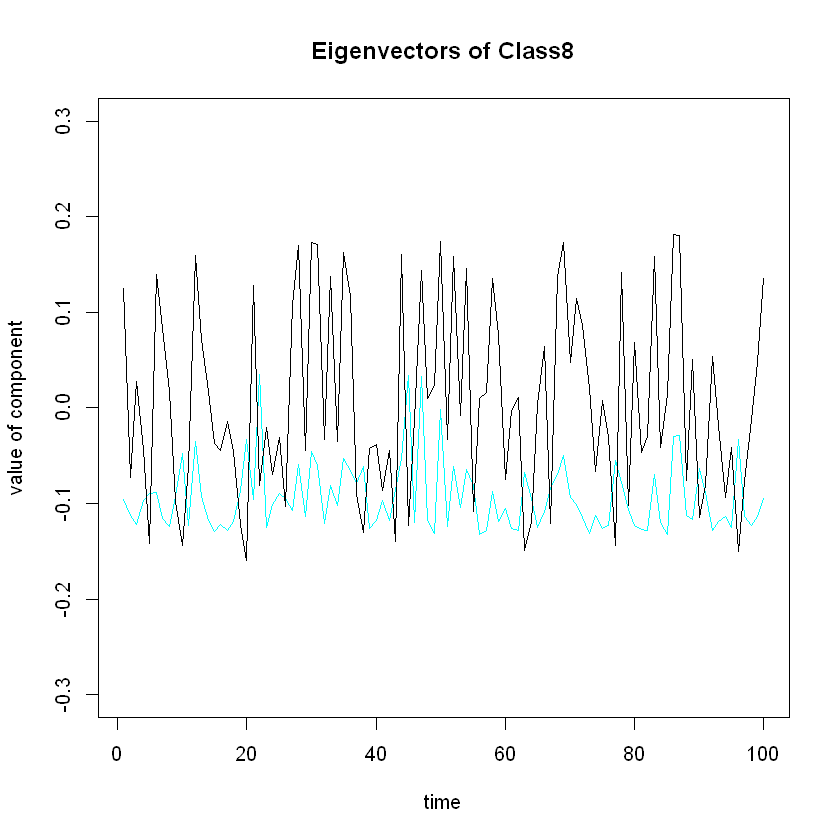

In [45]:
# for eigenvectors of Class 8
ev81 <- eigen(cov(fd_8))$vectors[,1]
ev82 <- eigen(cov(fd_8))$vectors[,2]
plot(1:length(ev81),ev81, type = "l", col = 5, 
     xlab = "time", ylab = "value of component",
    main = "Eigenvectors of Class8", ylim = c(-0.3,0.3))
lines(1:length(ev82),ev82, type = "l", col = 9)